# Research Project: Regression - Parkinsons Telemonitoring

Target Value: total_UPDRS (do NOT include motor_UPDRS in your attributes)

In [1]:
!wget -q https://archive.ics.uci.edu/static/public/189/parkinsons+telemonitoring.zip
!unzip -q parkinsons+telemonitoring.zip

In [1]:
import pandas as pd
df = pd.read_csv('parkinsons_updrs.data')
df.to_csv('parkinsons_updrs.csv')
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


Installation of PyCaret, the machine learning library necessary for efficient regression.

In [4]:
!pip install pycaret
import pycaret
pycaret.__version__ # '3.3.2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.9 MB/s eta 0:00:00
   ━━━━

'3.3.2'

---
# Setup
Initializing traning environment and creating transformation pipeline.

As per instruction, motor_UPDRS and subject# will be dropped

In [2]:
from pycaret.regression import *
df.drop('motor_UPDRS', axis=1, inplace=True)
df.drop('subject#', axis=1, inplace=True)
s = setup(df, target = 'total_UPDRS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


---
# Compare Models
The list of available models are generated here

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0987,0.0486,0.2184,0.9996,0.0084,0.0038,1.7360
rf,Random Forest Regressor,0.1982,0.1757,0.4135,0.9984,0.0152,0.0074,6.8410
xgboost,Extreme Gradient Boosting,0.2805,0.1858,0.4300,0.9984,0.0167,0.0111,0.8630
lightgbm,Light Gradient Boosting Machine,0.3103,0.2088,0.4540,0.9982,0.0192,0.0127,3.3220
dt,Decision Tree Regressor,0.1568,0.4146,0.6098,0.9963,0.0214,0.0057,0.1730
gbr,Gradient Boosting Regressor,0.9289,1.4889,1.2196,0.9868,0.0499,0.0375,2.5640
knn,K Neighbors Regressor,1.0575,4.0676,2.0106,0.9640,0.0976,0.0510,0.0560
ada,AdaBoost Regressor,2.1956,7.0794,2.6594,0.9371,0.1110,0.0920,1.1650
lr,Linear Regression,2.4004,10.3409,3.2150,0.9081,0.1229,0.0934,0.9410
ridge,Ridge Regression,2.3905,10.4366,3.2297,0.9073,0.1210,0.0930,0.0810


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Many baseline models are available, catboost is useful for avoiding plot errors and is the one used in the tutorial. However at the time of writing, it seems unavailable.

In [ ]:
best = create_model('catboost')

ValueError: Estimator catboost not available. Please see docstring for list of available estimators.

Extra Trees Regressor preformed the best quantitatively from the test, as such it will be used

In [3]:
best = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0333,2.8804,1.6972,0.9743,0.0978,0.0530
1,1.0083,3.1319,1.7697,0.9687,0.0907,0.0514
2,0.8933,2.5178,1.5868,0.9766,0.0994,0.0483
3,1.0558,3.4354,1.8535,0.9708,0.0897,0.0482
4,0.9515,2.4864,1.5768,0.9793,0.0741,0.0425
5,1.1172,4.4727,2.1149,0.9648,0.1288,0.0658
6,1.0971,4.0585,2.0146,0.9645,0.1024,0.0521
7,1.0924,4.0311,2.0078,0.9619,0.1110,0.0573
8,1.0566,2.8015,1.6738,0.9758,0.0875,0.0485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

---
# Analyze Model
`evaluate_model()` is useful in notebook, however it causes the CoLab runtime to hang, therefore it will not be used.

## Individual Plots

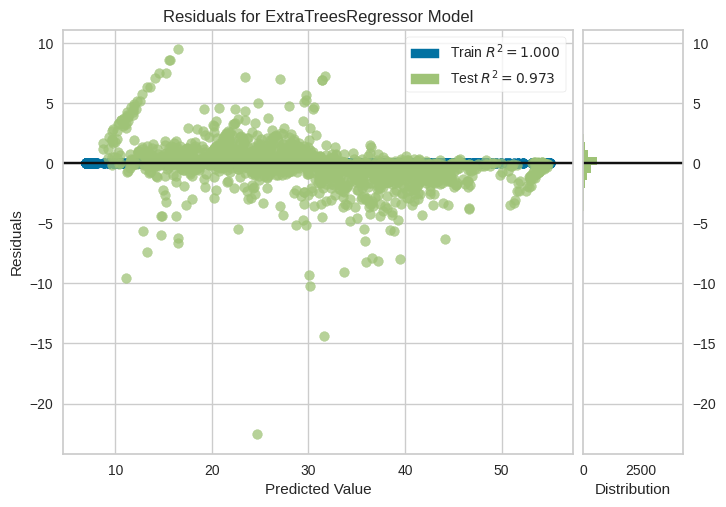

In [ ]:
plot_model(best, plot = 'residuals')

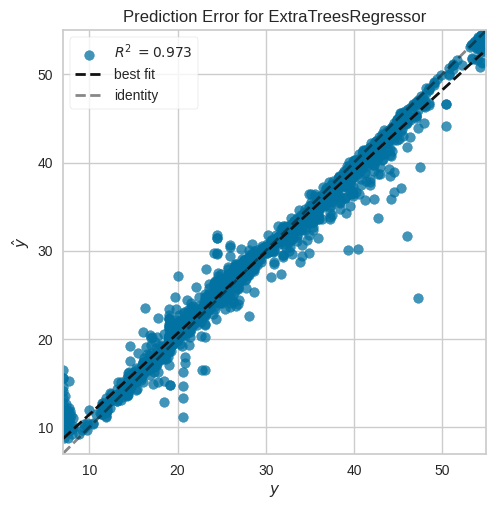

In [ ]:
plot_model(best, plot = 'error')

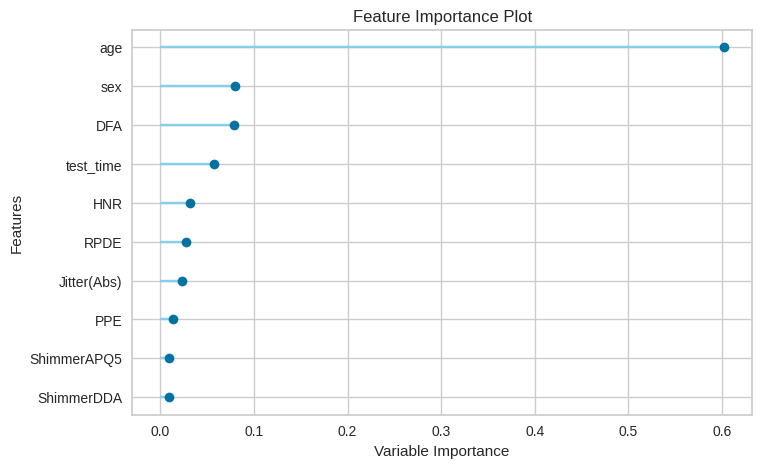

In [ ]:
plot_model(best, plot = 'feature')

---
# Prediction

In [ ]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.0087,3.1540,1.7759,0.9731,0.0886,0.0474


In [ ]:
holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,23.71318
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,28.67728
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,24.80491
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.27474
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,43.02786


Copy original data and drop total_UPDRS to focus on predicting labels on unseen dataset.

In [ ]:
new_data = df.copy()
new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,34.397999
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,34.894001
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.389000
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,35.810001
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000


---
# Save Model

In [ ]:
save_model(best, 'first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

# Repeat with Other Models

## 	K Neighbors Regressor

In [4]:
knn_model = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0732,64.8685,8.0541,0.4208,0.2964,0.2498
1,5.5838,52.1274,7.2199,0.4795,0.2821,0.2480
2,6.0668,65.6929,8.1051,0.3906,0.2956,0.2480
3,6.3539,73.5212,8.5745,0.3743,0.3109,0.2582
4,6.3668,72.3468,8.5057,0.3972,0.3028,0.2517
5,6.3783,70.2600,8.3821,0.4478,0.3211,0.2835
6,6.0710,61.0697,7.8147,0.4654,0.2828,0.2445
7,5.9850,60.8508,7.8007,0.4248,0.2921,0.2487
8,6.2110,67.2700,8.2018,0.4180,0.3065,0.2533


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

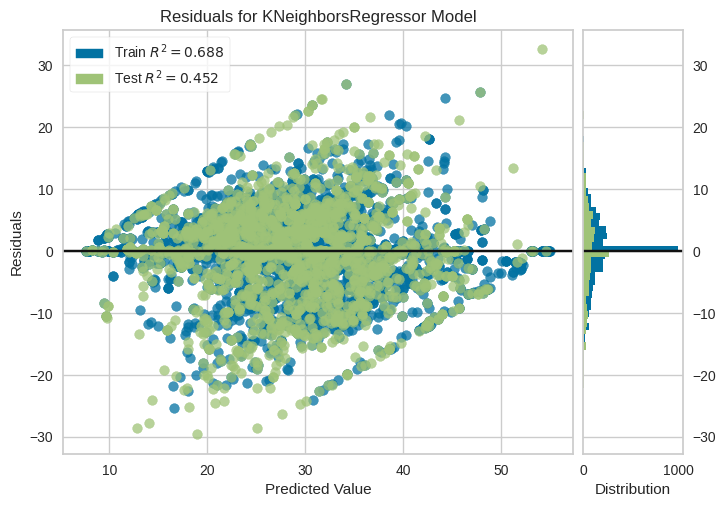

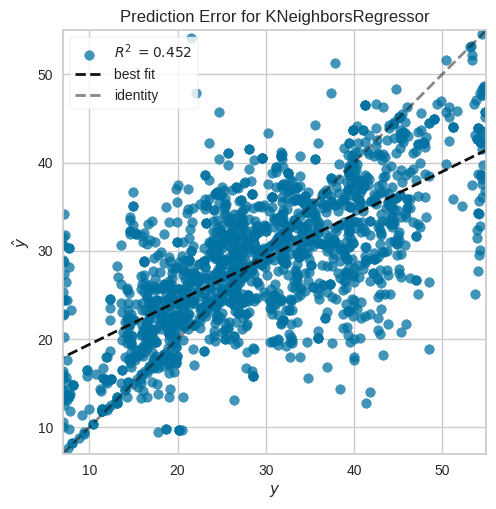

In [6]:
plot_model(knn_model, plot = 'residuals')
plot_model(knn_model, plot = 'error')
# unsupported
# plot_model(knn_model, plot = 'feature')

In [7]:
knn_holdout_pred = predict_model(knn_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,5.8972,64.2267,8.0142,0.4519,0.2969,0.2431


In [12]:
knn_holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,31.991261
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,29.031000
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,34.938396
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,30.344400
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,29.876400


In [13]:
knn_predictions = predict_model(knn_model, data = new_data)
knn_predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,44.494801
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,31.218002
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,33.894402
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,30.503199
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000


In [14]:
save_model(knn_model, 'knn_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [15]:
loaded_knn_pipeline = load_model('knn_pipeline')
loaded_knn_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', KNeighborsRegressor(n_jobs=-1))])

## Linear Regression

In [16]:
lr_model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.1124,94.2554,9.7085,0.1584,0.3627,0.3516
1,7.6685,85.7847,9.2620,0.1434,0.3645,0.3610
2,7.9592,91.0642,9.5428,0.1552,0.3604,0.3513
3,8.4657,102.5033,10.1244,0.1277,0.3628,0.3487
4,8.2228,99.9265,9.9963,0.1674,0.3576,0.3395
5,8.3018,101.4148,10.0705,0.2030,0.3845,0.3835
6,8.1531,95.7437,9.7849,0.1618,0.3601,0.3422
7,7.7447,89.3949,9.4549,0.1550,0.3618,0.3459
8,8.0961,95.9226,9.7940,0.1702,0.3600,0.3411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

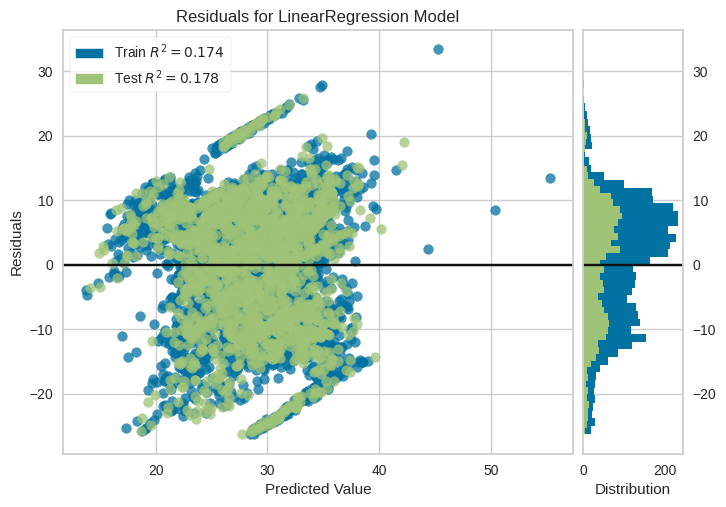

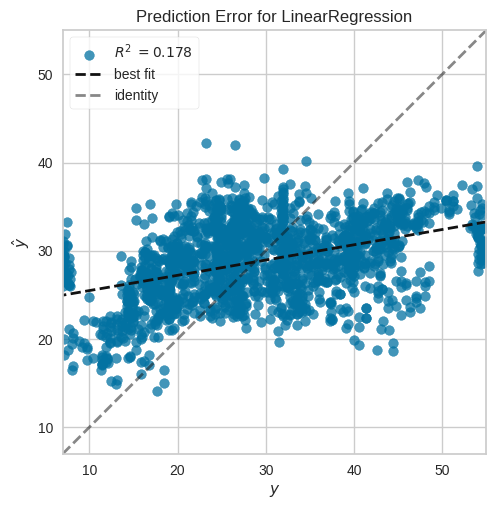

In [18]:
plot_model(lr_model, plot = 'residuals')
plot_model(lr_model, plot = 'error')
# unsupported
# plot_model(knn_model, plot = 'feature')

In [19]:
lr_holdout_pred = predict_model(lr_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,8.1682,96.2896,9.8127,0.1783,0.3601,0.3466


In [20]:
lr_holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,24.386978
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,30.378557
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,28.053450
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,33.773472
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,25.662720


In [21]:
lr_predictions = predict_model(lr_model, data = new_data)
lr_predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,33.756969
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,28.894154
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,34.267231
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,33.256325
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,31.666649


In [22]:
save_model(lr_model, 'lr_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [23]:
loaded_lr_pipeline = load_model('lr_pipeline')
loaded_lr_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LinearRegression(n_jobs=-1))])